# BTG Pactual - Análise de sentimentos

**INTEGRANTES:**


1. Dayllan de Souza Alho
2. Eric Tachdjian
3. Gabriela de Morais da Silva
4. Giovanna Furlan Torres
5. Lucas de Britto Vieira
6. Michel Mansur




# Introdução


**1.Problema a ser resolvido:**
O BTG Pactual enfrenta o desafio de otimizar suas estratégias de marketing digital e entender melhor o comportamento e preferências dos consumidores nas redes sociais. Com o aumento do investimento em marketing digital e a crescente utilização das redes sociais, a análise de dados de mídia social é fundamental para obter informações relevantes e tomar decisões de negócios mais eficazes. O objetivo é utilizar PLN para rastrear dados e analisar a receptividade dos usuários às campanhas no Instagram do banco, identificar palavras-chave nos comentários e direcionar novas campanhas baseadas nos interesses dos consumidores.

**2. Solução Proposta**
Sabendo que mais de 50% da população mundial que usa redes sociais por mais de 2 horas por dia e a crescente importância do marketing nas empresas (TAPI, 2023), o BTG Pactual em parceria com o Inteli está desenvolvendo o projeto de "Análise de Sentimento das Campanhas de Marketing em Redes Sociais". Através da tecnologia de Processamento de Linguagem Natural (PLN), será desenvolvido uma ferramenta que ajudará a empresa a compreender a receptividade dos clientes às suas campanhas de marketing e nas tomadas de decisões das áreas de negócios, através da análise de sentimento e identificação de palavras-chave nos comentários dos usuários, permitindo uma resposta rápida a possíveis problemas ou oportunidades.




A análise de sentimentos dos comentários das campanhas de marketing do instagram do BTG Pactual será realizada através do Google Colaboratory, por meio deste notebook. Nas sessões seguintes serão demonstradas passo a passo de como os dados foram utilizados até a conclusão e entrega do modelo esperado, passando pelas fases: 


1. Seleção dos dados;
2. Processamento dos dados selecionados;
3. Transformação dos dados (pré-processamento);
4. Teste do modelo; e
5. Interpretação e Avaliação do modelo;



#Setup

A configuração de setup é o processo de preparar e organizar o ambiente para uso. Envolvendo a instalação de bibliotecas e configuração de outros ajustes necessários. O objetivo é criar um ambiente funcional para executar tarefas específicas.

## 1.1.Conexão com drive

Para realizar a análise, padronização e manipulação dos dados é necessário selecionar a base de dados desejada. Neste documento a importação da mesma será feita através do Google Drive e o arquivo está em formato excel (csv).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.2. Instalando as bibliotecas

**Antes de Importar a base é necessário instalar algumas bibliotecas como:**
1. Pandas: é uma biblioteca de análise 
de dados em Python que oferece estruturas de dados e ferramentas para manipulação e análise de dados. Com o Pandas, é possível ler, escrever e manipular dados em diversos formatos, como CSV, Excel, SQL, etc. Ele oferece uma grande quantidade de funcionalidades para trabalhar com dados em Python, incluindo a capacidade de filtrar, agregar, reorganizar e transformar dados de várias maneiras.

2. TextBlob: é uma biblioteca de processamento de linguagem natural em Python. Ela oferece uma interface simples para tarefas comuns de NLP, como análise de sentimentos, correção ortográfica, extração de frases-chave e classificação de texto. O TextBlob é construído sobre a biblioteca NLTK (Natural Language Toolkit) e oferece uma sintaxe fácil de usar para muitas tarefas de processamento de linguagem natural. É uma biblioteca muito útil para análise de texto em Python.

3. Emoji: é uma biblioteca Python que permite a conversão de emojis de texto para representações de texto Unicode e vice-versa. Além disso, fornece funções úteis para trabalhar com emojis, como contar o número de emojis em uma string, remover todos os emojis de uma string e substituir cada emoji em uma string por um texto de substituição especificado.

4. Re: A biblioteca "re" é uma ferramenta para trabalhar com expressões regulares, permitindo a extração e manipulação de informações de forma eficiente. 

5. Unidecode: Unicode é um padrão de codificação de caracteres de forma universal para a representação de caracteres de todas as línguas escritas, bem como símbolos matemáticos, musicais, entre outros.

6. Enelvo.normaliser: A enelvo.normaliser é uma biblioteca específica para normalização de texto em português. Ela oferece recursos para corrigir erros de digitação, converter abreviações e substituir palavras informais por suas formas mais corretas. A função principal dessa biblioteca é auxiliar na normalização de texto, tornando-o mais padronizado e compreensível.

7. Numpy (np): A biblioteca numpy fornece estruturas de dados eficientes para manipulação e cálculos numéricos, além de funções matemáticas de alto desempenho.

8. Sklearn.feature_extraction.text.CountVectorizer: É uma classe do scikit-learn que converte uma coleção de documentos de texto em uma matriz de contagem de tokens. Cada documento é representado por um vetor onde cada elemento é o número de ocorrências de um token específico no documento.

9. Keras.preprocessing.text.Tokenizer: É uma classe do Keras que é usada para pré-processamento de texto. Ela converte texto em sequências de números inteiros (índices de palavras) ou matrizes esparsas. Também oferece recursos como tokenização, vetorização e indexação de palavras.

10. Nltk.tokenize.word_tokenize: É uma função do NLTK (Natural Language Toolkit) que divide um texto em uma lista de palavras ou tokens. É uma forma de tokenização que leva em consideração o contexto linguístico para separar as palavras.

In [ ]:
pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 6.3 MB/s eta 0:00:00


In [ ]:
pip install -U emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234911 sha256=a3b8190b563ffd13086b8366ebea6c947822e694cccebad13d5aad6ec48a6a76
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [ ]:
!pip install emoji --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install enelvo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from textblob import TextBlob
import emoji
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
nltk.download('wordnet')
import re
import unidecode
from enelvo.normaliser import Normaliser
import matplotlib.pyplot as plt


import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 1.3.Lendo CSV

In [ ]:
base = pd.read_csv('/content/drive/MyDrive/Modulo6/BaseBTG.csv')

A célula de código abaixo é responsável por realizar a leitura e apresentação dos dados carregados da base na etapa anterior.

**dados** - Apresenta a planilha dos comentários das campanhas de marketing do instagram do BTG Pactual

## 1.4.Visualização dos tipos de colunas

As colunas apresentadas na base de dados disponibilizada possui tipos diferentes de formatação, sendo divididos em:

1. **float :** Responsável por armazenar números reais com precisão de 6 casas decimais;
2. **object :** Responsável por armazenar qualquer tipo de dado genêrico, utilizado para representar características abstratas;
3. **int64 :** Dado numérico que pode armazenar valores inteiros de até 64 bits.

O código abaixo apresenta os tipos encontrados na planilha BaseBTGM6. 

In [ ]:
base.dtypes

id                        int64
dataPublicada            object
autor                    object
texto                    object
sentimento               object
tipoInteracao            object
anomalia                  int64
probabilidadeAnomalia     int64
linkPost                 object
processado                int64
contemHyperlink           int64
autor_anonimo             int64
diferenca                object
dtype: object

### 1.4.1 Retirando as "" dos nomes das colunas

Como é possível observar acima as colunas estão nomeadas com aspas, e para um melhor aproveitamento do código é preciso retirar essa pontuação dos nomes.

#### 1.4.1.1 Teste isolado da remoção das aspas

In [ ]:
#Criando um dataframe para teste
teste = pd.DataFrame({'"Nome"': ['Gabriela', 'Giovanna'], '"Idade"': [20, 30]})
print(teste.head())

#Função de tirar aspas dos nomes das colunas 
def tiraAspas(teste):
    teste.columns = [col.replace('"', '') for col in teste.columns]
    return teste

#Aplicação da função
teste = tiraAspas(teste)
print(teste.head())

     "Nome"  "Idade"
0  Gabriela       20
1  Giovanna       30
       Nome  Idade
0  Gabriela     20
1  Giovanna     30


#### 1.4.1.2. Definição da função

In [ ]:
def tiraAspas(base):
    base_rename = base.rename(columns=lambda x: re.sub('[\"\']', '', x))
    return base_rename


#### 1.4.1.3. Aplicação da função tiraAspas

In [ ]:
# Aplicando a função na base de dados
base_rename = tiraAspas(base)
#Resultado da função
base_rename

,id,dataPublicada,autor,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink,autor_anonimo,diferenca
0,1,2022-03-04 09:38:00,v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0,0,1,433 days 14:22:00
1,2,2022-03-04 09:29:00,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0,2,433 days 14:31:00
2,3,2022-03-04 09:20:00,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,0,3,433 days 14:40:00
3,4,2022-03-04 08:36:00,lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0,4,433 days 15:24:00
4,5,2022-03-03 21:10:00,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0,5,434 days 02:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12350,3044013,2022-11-30 11:51:00,onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação,1,54,https://www.instagram.com/reel/CllsqI7goSC/,0,0,4003,162 days 12:09:00
12351,3044212,2022-11-30 12:25:00,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação,0,39,https://www.instagram.com/p/Cllw0CmNGkX/,0,0,697,162 days 11:35:00
12352,3044213,2022-11-30 12:18:00,jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,comentário,1,52,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0,5838,162 days 11:42:00
12353,3044412,2022-11-30 12:50:00,moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação,0,43,https://www.instagram.com/reel/ClluX-cAoaf/,0,0,5103,162 days 11:10:00


### 1.4.2.Explicação das colunas

#### 1.4.2.1.Colunas utilizadas

## 1.5. Anonimização

Anonimizar dados é importante para garantir a privacidade e a segurança das informações pessoais dos indivíduos de forma ética e responsável. Além disso, ajuda a evitar viés. 

### 1.5.1.Teste isolado 

In [ ]:
# Criar um dataframe de exemplo
teste = pd.DataFrame({
    'autor': ['Dayllan', 'Erick', 'Gabriela', 'Giovanna', 'Lucas', 'Michel'],
    'comentario': ['Gostei do produto', 'Não gostei', 'Concordo com o Lucas', 'Achei muito caro', 'Gostei bastante', 'Não compraria de novo']
})

# Criar um dicionário para mapear cada autor ao seu identificador numérico
autores = teste['autor'].unique()
mapeamento = {autor: i+1 for i, autor in enumerate(autores)}

# Adicionar uma nova coluna com o identificador numérico
teste['autor_anonimo'] = teste['autor'].map(mapeamento)

# Exibir o resultado
print(teste)


      autor             comentario  autor_anonimo
0   Dayllan      Gostei do produto              1
1     Erick             Não gostei              2
2  Gabriela   Concordo com o Lucas              3
3  Giovanna       Achei muito caro              4
4     Lucas        Gostei bastante              5
5    Michel  Não compraria de novo              6


### 1.5.2.Definição da função de anonimação

In [ ]:
# Criar um dicionário para mapear cada autor ao seu identificador numérico
autores = base_rename['autor'].unique()
mapeamento = {autor: i+1 for i, autor in enumerate(autores)}

# Adicionar uma nova coluna com o identificador numérico
base_rename['autor_anonimo'] = base_rename['autor'].map(mapeamento)

# Salvar o dataframe com a nova coluna
base_rename.to_csv('/content/drive/MyDrive/Modulo6/BaseBTG.csv', index=False)

### 1.5.3. Teste da Anonimização

In [ ]:
base_rename['autor_anonimo']

0           1
1           2
2           3
3           4
4           5
         ... 
12350    4003
12351     697
12352    5838
12353    5103
12354    5839
Name: autor_anonimo, Length: 12355, dtype: int64

## 1.6. Formatação de Data

Esta etapa foi feita pois os cometários feitos 3 meses depois da postagem de uma campanha não são interessantes para a análise.

### 1.6.1.Teste isolado

In [ ]:
# Carregar a base de dados
teste = pd.DataFrame({'dataPublicada': ['2022-01-01 10:00:00', '2022-01-02 14:30:00', '2022-01-03 20:45:00', '2022-01-04 09:15:00'] })

# Remover as aspas duplas da coluna 'dataPublicada'
teste['dataPublicada'] = teste['dataPublicada'].apply(lambda x: x.replace('"', ''))

# Imprimir a coluna 'dataPublicada' sem as aspas duplas
print(teste['dataPublicada'])

# Converter a coluna 'data' para o formato de data
teste['dataPublicada'] = pd.to_datetime(teste['dataPublicada'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Verificar se existem valores válidos na coluna 'dataPublicada'
if teste['dataPublicada'].notna().any():
    # Obter a data atual
    data_atual = pd.Timestamp.now().normalize()

    # Calcular a diferença entre cada data na coluna e a data atual
    teste['diferenca'] = abs(teste['dataPublicada'] - data_atual)

    # Verificar se existem valores válidos na coluna 'diferenca'
    if teste['diferenca'].notna().any():
        # Encontrar a data com a menor diferença
        data_mais_proxima = teste['dataPublicada'].loc[teste['diferenca'].idxmin()]

        print("A data mais próxima do dia atual é:", data_mais_proxima)
    else:
        print("Não há valores válidos na coluna 'diferenca'.")
else:
    print("Não há valores válidos na coluna 'dataPublicada'.")

# Calcular a data três meses antes da data mais próxima
data_tres_meses_antes = data_mais_proxima - pd.DateOffset(months=3)

# Filtrar apenas as datas que são três meses antes da data mais próxima
datas_filtradas = teste.loc[teste['dataPublicada'] >= data_tres_meses_antes]

print("Datas três meses antes da data mais próxima:")
print(datas_filtradas['dataPublicada'])

# Criar um novo DataFrame com as colunas que atendem à regra
dadosTeste = teste[teste['dataPublicada'] >= data_tres_meses_antes][['dataPublicada']].copy()
dadosTeste

0    2022-01-01 10:00:00
1    2022-01-02 14:30:00
2    2022-01-03 20:45:00
3    2022-01-04 09:15:00
Name: dataPublicada, dtype: object
A data mais próxima do dia atual é: 2022-01-04 09:15:00
Datas três meses antes da data mais próxima:
0   2022-01-01 10:00:00
1   2022-01-02 14:30:00
2   2022-01-03 20:45:00
3   2022-01-04 09:15:00
Name: dataPublicada, dtype: datetime64[ns]


,dataPublicada
0,2022-01-01 10:00:00
1,2022-01-02 14:30:00
2,2022-01-03 20:45:00
3,2022-01-04 09:15:00


### 1.6.2.Datas antes da formatação

In [ ]:
base_rename['dataPublicada']

0        2022-03-04 09:38:00
1        2022-03-04 09:29:00
2        2022-03-04 09:20:00
3        2022-03-04 08:36:00
4        2022-03-03 21:10:00
                ...         
12350    2022-11-30 11:51:00
12351    2022-11-30 12:25:00
12352    2022-11-30 12:18:00
12353    2022-11-30 12:50:00
12354    2022-11-30 14:27:00
Name: dataPublicada, Length: 12355, dtype: object

### 1.6.3.Processando a coluna dataPublicada

In [ ]:
# Remover as aspas duplas da coluna 'dataPublicada'
base_rename['dataPublicada'] = base_rename['dataPublicada'].apply(lambda x: x.replace('"', ''))

# Imprimir a coluna 'dataPublicada' sem as aspas duplas
print(base_rename['dataPublicada'])

0        2022-03-04 09:38:00
1        2022-03-04 09:29:00
2        2022-03-04 09:20:00
3        2022-03-04 08:36:00
4        2022-03-03 21:10:00
                ...         
12350    2022-11-30 11:51:00
12351    2022-11-30 12:25:00
12352    2022-11-30 12:18:00
12353    2022-11-30 12:50:00
12354    2022-11-30 14:27:00
Name: dataPublicada, Length: 12355, dtype: object


In [ ]:
# Converter a coluna 'data' para o formato de data
base_rename['dataPublicada'] = pd.to_datetime(base_rename['dataPublicada'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Verificar se existem valores válidos na coluna 'dataPublicada'
if base_rename['dataPublicada'].notna().any():
    # Obter a data atual
    data_atual = pd.Timestamp.now().normalize()

    # Calcular a diferença entre cada data na coluna e a data atual
    base_rename['diferenca'] = abs(base_rename['dataPublicada'] - data_atual)

    # Verificar se existem valores válidos na coluna 'diferenca'
    if base_rename['diferenca'].notna().any():
        # Encontrar a data com a menor diferença
        data_mais_proxima = base_rename['dataPublicada'].loc[base_rename['diferenca'].idxmin()]

        print("A data mais próxima do dia atual é:", data_mais_proxima)
    else:
        print("Não há valores válidos na coluna 'diferenca'.")
else:
    print("Não há valores válidos na coluna 'dataPublicada'.")


A data mais próxima do dia atual é: 2022-11-30 14:27:00


Buscando três meses antes do último registro do DataFrame

In [ ]:
# Calcular a data três meses antes da data mais próxima
data_tres_meses_antes = data_mais_proxima - pd.DateOffset(months=3)

# Filtrar apenas as datas que são três meses antes da data mais próxima
datas_filtradas = base_rename.loc[base_rename['dataPublicada'] >= data_tres_meses_antes]

print("Datas três meses antes da data mais próxima:")
print(datas_filtradas['dataPublicada'])

Datas três meses antes da data mais próxima:
8323    2022-08-30 14:37:00
8324    2022-08-30 15:11:00
8325    2022-08-30 16:35:00
8326    2022-08-30 16:50:00
8327    2022-08-30 17:15:00
                ...        
12350   2022-11-30 11:51:00
12351   2022-11-30 12:25:00
12352   2022-11-30 12:18:00
12353   2022-11-30 12:50:00
12354   2022-11-30 14:27:00
Name: dataPublicada, Length: 4032, dtype: datetime64[ns]


In [ ]:
# Criar um novo DataFrame com as colunas que atendem à regra
dados = base_rename[base_rename['dataPublicada'] >= data_tres_meses_antes][['dataPublicada', 'autor_anonimo', 'texto', 'sentimento', 'tipoInteracao']].copy()

## 1.7. Base Tratada

In [ ]:
dados

,dataPublicada,autor_anonimo,texto,sentimento,tipoInteracao
8323,2022-08-30 14:37:00,697,Quer visualizar o saldo de todas as suas conta...,NEGATIVE,marcação
8324,2022-08-30 15:11:00,173,Preços excelentes na hora de investir em boas ...,POSITIVE,marcação
8325,2022-08-30 16:35:00,4120,Onde consigo realizar uma simulação de seguro ...,POSITIVE,comentário
8326,2022-08-30 16:50:00,4121,Taxa adm alta e ainda taxa de performance num ...,NEUTRAL,comentário
8327,2022-08-30 17:15:00,3295,🔥 Faça parte do clube de vantagens BTG. 💯 👉🏻 ...,POSITIVE,marcação
...,...,...,...,...,...
12350,2022-11-30 11:51:00,4003,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação
12351,2022-11-30 12:25:00,697,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação
12352,2022-11-30 12:18:00,5838,Estou muito grato por todo o esforço que você ...,POSITIVE,comentário
12353,2022-11-30 12:50:00,5103,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação


# Explicação das Etapas

## Teste Isolado 

Define-se um teste isolado, como o teste do sistema de forma independente, verificando todo o processo específico, sem interferência de outros componentes. A execução é feita de forma separada, com o fornecimento da entrada específica, auxiliando na identificação de problemas, além de permitir "guardar" a lógica utilizada no desenvolvimento do programa em larga escala.

## Teste da Função

Responsável pela verificação do funcionamento da função específica do sistema. Busca Verificar se a função produz os resultados esperados.

Através dela, nesse programa,a criamos a pipeline do sistema. Uma sequência de processos que são executados em uma determinada ordem, buscando modificar no caso, realizar o pré-processamento dos textos fornecidos. Assim, utiliza-se o resultado da etapa anterior como entrada para a próxima. O objetivo é automatizar a execuçã dividindo-as em tarefas menores e mais simples.

# Atividade 1: Remoção de comentários do BTGPactual

A remoção dos comentários relacionados à empresa BTG Pactual da coluna “autor” da base de dados, foi realizada uma vez que o objetivo é analisar as opiniões e sentimentos expressos pelos usuários em relação à empresa, e incluir os comentários feitos pela própria empresa poderia enviesar os resultados. 

## 1.1.Teste isolado da remoção de comentários do BTGPactual

In [ ]:
# Criando um DataFrame para o teste
teste = pd.DataFrame({
    'autor': ['@btgPactual', '@inteli', '@btgPactual', '@btgPactual', '@inteli', '@SisitemasDeInformação'],
    'texto': ['Obrigada pelo feedback', 'Poderia Melhorar as transações do pix', 'Obrigada pelo feedback', 'Obrigada pelo feedback', 'Gosto muito no BTG', 'Sistemas é o melhor curso.']
})

print(teste)

# Função de retirar comentários do BTGPactual
def filtrar_dados_por_autor(teste, autor):
    # Filtra os dados por autor, removendo as linhas em que a coluna 'autor' contém a string passada como parâmetro.
    # Substitui os valores nulos (NaN) da coluna 'autor' por 'desconhecido'.
    # Retorna um novo DataFrame com as linhas filtradas.
    # Substitui os valores nulos (NaN) da coluna 'autor' por 'desconhecido'.
    teste['autor'] = teste['autor'].fillna('desconhecido')

    # Cria um novo DataFrame chamado 'dados_filtrados', que contém todas as linhas do DataFrame original (dados), exceto aquelas em que a coluna 'autor' contém a string passada como parâmetro.
    # O operador ~ é usado para selecionar todas as linhas em que a condição 'dados['autor'].str.contains(autor)' é falsa.
    dados_filtrados = teste[~teste['autor'].str.contains(autor)]
    
    return dados_filtrados

dados_filtrados = filtrar_dados_por_autor(teste, '@btgPactual')
print(dados_filtrados)


                    autor                                  texto
0             @btgPactual                 Obrigada pelo feedback
1                 @inteli  Poderia Melhorar as transações do pix
2             @btgPactual                 Obrigada pelo feedback
3             @btgPactual                 Obrigada pelo feedback
4                 @inteli                     Gosto muito no BTG
5  @SisitemasDeInformação             Sistemas é o melhor curso.
                    autor                                  texto
1                 @inteli  Poderia Melhorar as transações do pix
4                 @inteli                     Gosto muito no BTG
5  @SisitemasDeInformação             Sistemas é o melhor curso.


## 1.2. Definição de Função

Função de remoção de autor

In [ ]:
def filtrar_dados_por_autor(dados, autor_anonimo):
    # Converter a coluna 'autor_anonimo' para o tipo string
    dados['autor_anonimo'] = dados['autor_anonimo'].astype(str)
    
    # Filtrar os dados por autor, removendo as linhas em que a coluna 'autor_anonimo' contém a string passada como parâmetro
    # Substituir os valores nulos (NaN) da coluna 'autor_anonimo' por 'desconhecido'
    dados_anonimos = dados[~dados['autor_anonimo'].str.contains(autor_anonimo, na=False)]
    
    return dados_anonimos

## 1.3. Testes da Função de Remoção de autor

In [ ]:
dados_filtrados = filtrar_dados_por_autor(dados, 'autor_anonimo')
dados_filtrados

,dataPublicada,autor_anonimo,texto,sentimento,tipoInteracao
8323,2022-08-30 14:37:00,697,Quer visualizar o saldo de todas as suas conta...,NEGATIVE,marcação
8324,2022-08-30 15:11:00,173,Preços excelentes na hora de investir em boas ...,POSITIVE,marcação
8325,2022-08-30 16:35:00,4120,Onde consigo realizar uma simulação de seguro ...,POSITIVE,comentário
8326,2022-08-30 16:50:00,4121,Taxa adm alta e ainda taxa de performance num ...,NEUTRAL,comentário
8327,2022-08-30 17:15:00,3295,🔥 Faça parte do clube de vantagens BTG. 💯 👉🏻 ...,POSITIVE,marcação
...,...,...,...,...,...
12350,2022-11-30 11:51:00,4003,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação
12351,2022-11-30 12:25:00,697,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação
12352,2022-11-30 12:18:00,5838,Estou muito grato por todo o esforço que você ...,POSITIVE,comentário
12353,2022-11-30 12:50:00,5103,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação


# Atividade 2: Descrição de emojis de Emojis

Emoji é uma representação gráfica que neste contexto pode expressar sentimentos. Sendo assim foi utilizado um método de tradução e interpretação do emoji.

## 2.1.Teste isolado para função de descrição de emojis

In [ ]:
# criando DataFrame de teste
teste = pd.DataFrame({'texto': ['Oi 👋', 'Tudo bem? 😊', '🌞☕']})
teste['texto']

# define a função de remoção de emojis
def removeEmoji():
    remove_emoji = lambda x: emoji.demojize(str(x)).replace(":", "").strip()
    return remove_emoji

# Aplica a função 
teste['textoLimpo'] = teste['texto'].apply(removeEmoji())
teste['textoLimpo']

0                              Oi waving_hand
1    Tudo bem? smiling_face_with_smiling_eyes
2                   sun_with_facehot_beverage
Name: textoLimpo, dtype: object

## 2.2. Descrição da função

In [ ]:
# define a função de remoção de emojis
def removeEmoji():
    remove_emoji = lambda x: emoji.demojize(str(x)).replace(":", "").strip()
    return remove_emoji

## 2.3. Teste da função

In [ ]:
# aplica a função à coluna "texto" do DataFrame
def removeEmoji_(dados_filtrados_):
    dados['textoLimpo'] = dados_filtrados_.apply(removeEmoji())   
    textoEmoji = dados['textoLimpo']
    return textoEmoji

In [ ]:
textoEmoji__ = removeEmoji_(dados_filtrados['texto'])

# Atividade 3: Remoção de pontuações e acentos.

As pontuações e acentos não carregam significado semântico ou lexical relevante. O uso deles pode dificultar a análise de textos e a comparação de palavras. Além de poder tornar mais difícil o treinamento e a aplicação de modelos de PLN. Logo o processo de remoção de pontuações e acentos pode ajudar a normalizar o texto e reduzir o número de recursos que precisam ser analisados e comparados. 

Ou seja, visa a remoção de símbolos de pontuação, e caracteres especiais, os quais não possuem significado semântico e podem interferir em análises de texto. A remoção é feita usando expressões regulares, colaborando para simplificar o texto, resultando em análises mais eficientes.

## 3.1.Remoção de pontuações 

###3.1.1 Teste isolado

Foi utilizado o parâmetro [^\w\s]|_ para localizar e substituir caracteres não alfanuméricos em uma string.

In [ ]:
#Criando dataframe para teste isolado 
teste = pd.DataFrame({'texto': ['@BTGPacual tem como ajudar a @Ana_clara #obrigado!', 'Olá!@BtgPac_tual Tudo bem_?']})

def removeCaracteres(texto):
    if isinstance(texto, str):# verifica se o que está sendo processado é uma string
        return re.sub(r'[^\w\s]|_', ' ', texto)#substituir todos os caracteres especiais por uma string vazia 
    else:
        return texto
# define a função de remoção de caracteres
remove_caracteres = lambda x: removeCaracteres(str(x))
#Aplica a função 
teste['texto'] = teste['texto'].apply(remove_caracteres)
teste['texto']

0     BTGPacual tem como ajudar a  Ana clara  obrig...
1                          Olá  BtgPac tual Tudo bem  
Name: texto, dtype: object

## 3.1.2.Definição da função remove caracteres especiais

Foi utilizado o parâmetro [^\w\s] para localizar e substituir caracteres não alfanuméricos em uma string.

In [ ]:
def removeCaracteres(text):
    if isinstance(text, str):# verifica se o que está sendo processado é uma string
        return re.sub(r'[^\w\s]', '', text)#substituir todos os caracteres especiais por uma string vazia 
    else:
        return text
# define a função de remoção de caracteres
remove_caracteres = lambda x: removeCaracteres(str(x))

## 3.1.3. Teste da função remove caracteres

In [ ]:
# aplica a função à coluna "textoLimpo" do DataFrame
def removeCaracteres_(textoEmoji_):
    dados['textoLimpo'] = textoEmoji_.apply(remove_caracteres)
    texto_limpo = dados['textoLimpo']
    return texto_limpo  

In [ ]:
texto_limpo__ = removeCaracteres_(textoEmoji__)
texto_limpo__

8323     Quer visualizar o saldo de todas as suas conta...
8324     Preços excelentes na hora de investir em boas ...
8325     Onde consigo realizar uma simulação de seguro ...
8326     Taxa adm alta e ainda taxa de performance num ...
8327     fire Faça parte do clube de vantagens BTG hund...
                               ...                        
12350    Uma noite de encontros e muito conhecimento on...
12351    Erros financeiros para eliminar antes dos 30 a...
12352    Estou muito grato por todo o esforço que você ...
12353    backhand_index_pointing_rightGUADAKAN está che...
12354    btgpactual pq o morning call não está mais apa...
Name: textoLimpo, Length: 4032, dtype: object

## 3.2.Remoçaõ de acentos 

### 3.2.1.Teste isolado função retira acentos

In [ ]:
#Criando dataframe para teste isolado 
teste = pd.DataFrame({'texto': ['Olá como vai você?', 'Função de remoção']})
teste
# define a função de remoção de acentos
def removeAcentos(x):
    return unidecode.unidecode(x) if isinstance(x, str) else x
# aplica a função no DataFrame
teste['texto'] = teste['texto'].apply(removeAcentos)
teste['texto']

0    Ola como vai voce?
1     Funcao de remocao
Name: texto, dtype: object

## 3.2.2.Definição da função retira acentos

 A função unidecode.unidecode(x) é utilizada para remover caracteres acentuados e outros caracteres especiais de strings.

In [ ]:
# define a função de remoção de acentos
def removeAcentos(x):
    return unidecode.unidecode(x) if isinstance(x, str) else x

## 3.2.3 Teste da função retira acentos

In [ ]:
# aplica a função à coluna "textoLimpo" do DataFrame
def removeAcentos_(removeCaracteres_):
    dados['textoLimpo'] = removeCaracteres_.apply(removeAcentos)
    return dados['textoLimpo']

In [ ]:
removeAcentos__ = removeAcentos_(texto_limpo__)





# Atividade 4: Conversão de gírias e abreviações

O código visa atuar na transformação de gírias, abreviações e termos informais em palavras completas para melhorar a compreensão e consistência dos textos.

## 4.1. Teste Isolado que remove as gírias e abreviações

In [ ]:
norm = Normaliser(tokenizer='readable')

mensagem = 'Até hj vc n me respondeu. Oq aconteceu?'
resposta = norm.normalise(mensagem)
print(resposta)

até hoje você não me respondeu . o que aconteceu ?


## 4.2. Definição da Função de remoção das gírias e abreviações

In [ ]:
# Dicionário de gírias e abreviações para normalização
dicionario_girias = {
    'vc': 'você',
    'vcs':'você',
    'Vc': 'você',
    'pq': 'porque',
    'tbm': 'também',
    'q': 'que',
    'td': 'tudo',
    'blz': 'beleza',
    'flw': 'falou',
    'kd': 'cadê',
    'to': 'estou',
    'mt': 'muito',
    'cmg': 'comigo',
    'ctz': 'certeza',
    'jah': 'já',
    'naum': 'não',
    'ta': 'está',
    'eh': 'é',
    'vlw': 'valeu',
    'p': 'para',
    'qnd': 'quando',
    'msm': 'mesmo',
    'fzr': 'fazer',
    'agr': 'agora'
    }

# Conjunto de palavras a serem desconsideradas encontradas em pré-processamento exploratório
palavras_desconsideradas = {
    "warrenbrasil", "sportainmetâ", "sportainmentâ", "hubstage", "kaletsky", "scandiuzzi", "futofmoney",
    "disclaimer", "astraoficialbr", "furnasenergia", "alelobrasil", "bancodaycoval", "grupohagana",
    "steinwaybrasil", "joseavillez", "dianaroth", "beachtennis", "alliancejjteam", "fabiogurgel",
    "masterjacare", "gigipaivabjj", "clubefiinews", "mouratoglou", "octocapitalbr"}

# Função para normalizar o texto substituindo gírias e abreviações
def normalizar_texto(texto):
    palavras = texto.split()
    palavras_normalizadas = []
    
    for palavra in palavras:
        # Verificar se a palavra está no conjunto de palavras desconsideradas ou é igual a "criptomoedas"
        if palavra in palavras_desconsideradas or palavra == 'criptomoedas':
            # Se for uma palavra desconsiderada, adicionar à lista sem fazer alterações
            palavras_normalizadas.append(palavra)
        else:
            # Caso contrário, substituir gírias e abreviações normalmente
            palavra_normalizada = dicionario_girias.get(palavra, palavra)
            palavras_normalizadas.append(palavra_normalizada)
    
    texto_normalizado = ' '.join(palavras_normalizadas)
    
    return texto_normalizado

# Aplicar a função de normalização na coluna "textoLimpo" do DataFrame
def normalizar_texto_(removeAcento_):
    # Aplicar a função de normalização na coluna "textoLimpo" do DataFrame
    dados['texto_normalizado'] = removeAcento_.apply(normalizar_texto)
    return dados['texto_normalizado']

texto_normalizado__ = normalizar_texto_(removeAcentos__)

## 4.3. Teste da Função que remove as gírias e abreviações

In [ ]:

#Frase original
print(dados['texto'].iloc[104])
#Frase normalizada com a remoção de abreviações
print(texto_normalizado__.iloc[104], "\n")

#Frase original
print(dados['texto'].iloc[206])
#Frase normalizada com a remoção de abreviações
print(texto_normalizado__.iloc[206])

BRCR11 na casa dos 70 reais, pq não recomendou quando estava na casa dos 55 reais???
BRCR11 na casa dos 70 reais porque nao recomendou quando estava na casa dos 55 reais 

@vlpd85 nossa misericórdia. Em 2019 não tinha dificuldade pq era menor a plataforma. Eu confesso que não tive coragem de por tudo no investimento lá por causa da biometria facial. Vc tentou falar no Bacen?
vlpd85 nossa misericordia Em 2019 nao tinha dificuldade porque era menor a plataforma Eu confesso que nao tive coragem de por tudo no investimento la por causa da biometria facial você tentou falar no Bacen






#Atividade 5: Tokenização e remoção de StopWords

1. Tokenização:

Tokenização é um processo de pré-processamento textual, que tem como finalidade dividir os textos fornecidos em unidades menores, as quais chamamos de "tokens". Esse processo visa criar uma representação estruturada do texto, facilitando a manipulação, principalmente para processamento de linaguagem natural.

2. StopWords:

Tal processo consiste na remoção de algumas palavras setadas, que são comuns na língua escolhida, mas não possuem um significado importante para a análise de textos. O nome atribuído a essas palavras são "parasitas" para a análise, uma vez que com elas ou sem elas, o texto permanece com o mesmo sentido, ou seja, elas não contribuem para a identificação de sentimentos de um texto, podendo prejudicar a precisão de análises de processamento de linguagem natural.

## 5.1. Teste Isolado que tokeniza e Remove StopWords

In [ ]:
# Definição da frase de entrada
frase = "Agradecemos o seu feedback!"

# Converter a frase para letras minúsculas
frase = frase.lower()

# Tokenização da frase
tokens = word_tokenize(frase)

# Remoção das stop words
stop_words = set(stopwords.words('portuguese'))
tokens_sem_stopwords = [token for token in tokens if token not in stop_words]

# Imprimir os tokens resultantes
print("Tokens:")
print(tokens_sem_stopwords)


Tokens:
['agradecemos', 'feedback', '!']


## 5.2 Definição da Função de Tokenização e Remoção de StopWords

In [ ]:
# Definição da frase de entrada
palavras = texto_normalizado__

def processarTexto(text):
    # Converter palavras da frase para minúsculas
    text = text.lower() 
    # Tokenizar o texto em palavras
    tokens = word_tokenize(text) 
    # Remover stopwords das palavras tokenizadas
    stop_words = stopwords.words('portuguese') 
    # Retorna a lista de comentários sem as palavras setadas para serem removidas
    tokens = [token for token in tokens if token not in stop_words] 
    # Retorna o resultado da frase tokenizada, sem stopWords
    return tokens

def processarTexto_(normTexto):
    tokens_processados = normTexto.map(processarTexto)
    return tokens_processados

## 5.3. Teste da Função que tokeniza e remove StopWords

In [ ]:
# Acessar o valor da coluna 'texto_normalizado' na linha 30
valor_30 = texto_normalizado__.iloc[206]
print(valor_30)

# Processar o texto e redefinir o índice do DataFrame
tokens_processados = palavras.map(processarTexto).reset_index(drop=True)

# Acessar o token na linha 30
token30 = tokens_processados[206]
print(token30)

vlpd85 nossa misericordia Em 2019 nao tinha dificuldade porque era menor a plataforma Eu confesso que nao tive coragem de por tudo no investimento la por causa da biometria facial você tentou falar no Bacen
['vlpd85', 'misericordia', '2019', 'nao', 'dificuldade', 'porque', 'menor', 'plataforma', 'confesso', 'nao', 'coragem', 'tudo', 'investimento', 'la', 'causa', 'biometria', 'facial', 'tentou', 'falar', 'bacen']






# Atividade 6: Vetorização | Bag Of Words

A aplicação do modelo visa realizar a criação do vocabulário de palavras únicas presentes dos comentários tratados. Aplicar a vetorização dos campos de texto processados, ou seja, transformação dos textos em vetores numéricos para assim, gerar a matriz binária correspondente a frequência de cada palavra do vocabulário.

## 6.1. Teste Isolado

In [ ]:
# Definição da frase de entrada
frase = "Agradecemos o seu feedback!"

# Cria o vetorizador para o modelo Bag of Words
vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b")

# Aplica o vetorizador à frase para criar a representação Bag of Words
bow_representation = vectorizer.fit_transform([frase])

# Obtém o dicionário de palavras
dicionario = vectorizer.vocabulary_

# Imprimir a representação Bag of Words
print("Representação Bag of Words:")
print(bow_representation.toarray())

Representação Bag of Words:
[[1 1 1 1]]


## 6.2. Definição da Função de Vetorização

In [ ]:
def bag_of_words(frases):
    # Cria o vetorizador para o modelo Bag of Words
    vectorizer = CountVectorizer()

    # Concatena os tokens de cada frase em uma única string
    frases_concatenadas = [' '.join(tokens) for tokens in frases]

    # Aplica o vetorizador aos textos para criar a representação Bag of Words
    bow_representation = vectorizer.fit_transform(frases_concatenadas)

    # Obtém o dicionário de palavras
    dicionario = vectorizer.vocabulary_

    return bow_representation, dicionario

# Definição da frase de entrada
palavras = tokens_processados

# Aplicar a função de Bag of Words
bow_representation, dicionario = bag_of_words(palavras)

## 6.3. Teste da Função de Vetorização

In [ ]:
# Imprimir o dicionário de palavras
print("Dicionário de palavras:")
print(dicionario, "\n")

# Imprimir a representação Bag of Words
print("Representação Bag of Words:")
print(bow_representation.toarray())

Dicionário de palavras:
{'quer': 14492, 'visualizar': 18187, 'saldo': 15703, 'todas': 17166, 'contas': 4790, 'bancarias': 2481, 'so': 16297, 'lugar': 11019, 'solucao': 16379, 'ajudar': 1271, 'voce': 18244, 'compartilha': 4369, 'dados': 5317, 'outras': 12859, 'instituicoes': 9839, 'open': 12703, 'finance': 7925, 'aplicativo': 1770, 'btg': 3195, 'banking': 2530, 'gera': 8551, 'visao': 18160, 'global': 8654, 'soma': 16393, 'todos': 17171, 'saldos': 15704, 'funcao': 8311, 'pratica': 13859, 'facilita': 7556, 'vida': 18090, 'financeira': 7927, 'dia': 5905, 'confira': 4571, 'video': 18099, 'passo': 13144, 'aproveite': 1874, 'jeito': 10212, 'desktop_computer': 5782, 'wwwamgcapitalcombr': 18481, 'email': 6555, 'contatoamgcapitalcombr': 4794, 'credenciados': 5085, 'btgpactual': 3220, 'telephone': 16902, 'telefones': 16900, 'sao': 15768, 'paulo': 13196, '11': 81, '3077': 404, '4600': 501, 'porto': 13740, 'alegre': 1325, '51': 534, '3557': 431, '1880': 196, 'florianopolis': 8056, '48': 507, '3371'





# Atividade 7: Tratamento das Datas

O tratamento da data foi realizado, a pedido do cliente, utilizando somente os comentários com publicação nos últimos três meses, tendo como base a última data incrementada na base de dados.

In [ ]:
graf_dados = dados.loc[dados['dataPublicada'] >= data_tres_meses_antes, ['dataPublicada', 'autor_anonimo', 'texto_normalizado', 'sentimento']].copy()

#Atvidade 8: Pipeline do Pré Processamento


Célula responsável por chamar as funções do pré-processamento de forma sequencial.



*   Observação: A pipeline não realiza o retorno da Matriz do Bag Of Words, já apresentada em células acima, isso porque retornar a matriz em uma função pode consumir muita memória e tempo de processamento, dificultando o manuseio e o uso eficiente dos resultados, principalmente em uma pipeline que visa a quebra de tarefas para uma gestão mais eficiente dos códigos. Em vez disso, espera-se em versões posteriores apresentar como retorno da matriz resultados resumidos e mais rápidos de processo, como métricas de desempenho, resultados de classificação ou outros dados relevantes que possam ser facilmente manipulados e interpretados em outras partes do código. Tal decisão foi tomada para evitar problemas de desempenho e otimizar o uso dos recursos computacionais disponíveis.



In [ ]:
#Pipeline
dados_filtrados_ = dados_filtrados['texto'] #Parte do df que será utilizada para o pré-processamento
textoEmoji_ = removeEmoji_(dados_filtrados_) #Tratamento dos Emojis
removeCaracter_ = removeCaracteres_(textoEmoji_) #Removendo os caracteres especiais
removeAcento_ = removeAcentos_(removeCaracter_) #Removendo acentos
normTexto = normalizar_texto_(removeAcento_) #Tratamento de gírias e abreviações
proceTexto = processarTexto_(normTexto) #Tokenização
bow__ = bag_of_words(proceTexto) #Visualiza o dicionário criado para a realização da matriz BOW
bow__

(<4032x18582 sparse matrix of type '<class 'numpy.int64'>'
 	with 103878 stored elements in Compressed Sparse Row format>,
 {'quer': 14492,
  'visualizar': 18187,
  'saldo': 15703,
  'todas': 17166,
  'contas': 4790,
  'bancarias': 2481,
  'so': 16297,
  'lugar': 11019,
  'solucao': 16379,
  'ajudar': 1271,
  'voce': 18244,
  'compartilha': 4369,
  'dados': 5317,
  'outras': 12859,
  'instituicoes': 9839,
  'open': 12703,
  'finance': 7925,
  'aplicativo': 1770,
  'btg': 3195,
  'banking': 2530,
  'gera': 8551,
  'visao': 18160,
  'global': 8654,
  'soma': 16393,
  'todos': 17171,
  'saldos': 15704,
  'funcao': 8311,
  'pratica': 13859,
  'facilita': 7556,
  'vida': 18090,
  'financeira': 7927,
  'dia': 5905,
  'confira': 4571,
  'video': 18099,
  'passo': 13144,
  'aproveite': 1874,
  'jeito': 10212,
  'desktop_computer': 5782,
  'wwwamgcapitalcombr': 18481,
  'email': 6555,
  'contatoamgcapitalcombr': 4794,
  'credenciados': 5085,
  'btgpactual': 3220,
  'telephone': 16902,
  'telefo

## 8.1 Ilustração Pipeline

Apresenta-se a sequência de etapas que são aplicadas em uma ordem específica para processar dados de forma ilustrativa. Exibindo suas etapas em fluxo, além de exemplos de uso de forma gráfica, na figura abaixo.

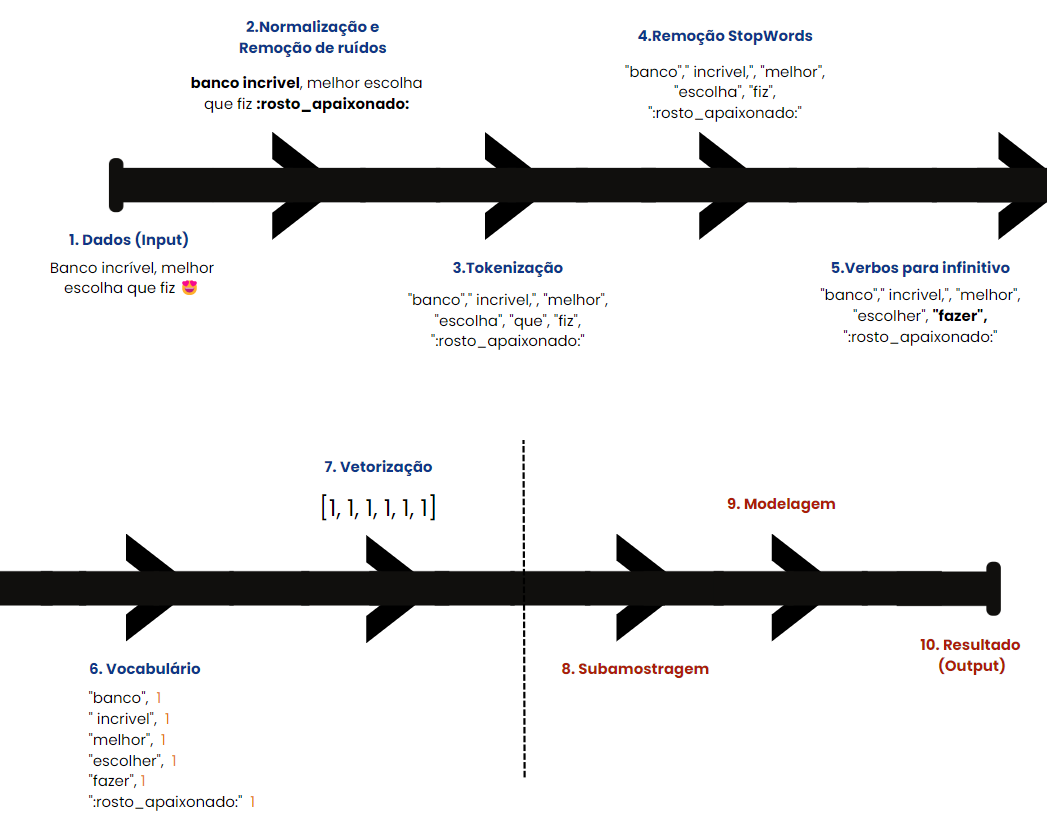

# Atividade 9 : Análise Descritiva

Apresenta-se a etapa inicial e fundamental na análise de dados, fornecendo códigos das características e padrões presentes nos dados coletados. Permitindo uma compreensão inicial dos dados e auxilio na tomada de decisões e na formulação de estratégias com base nas informações disponíveis. Por meio desta, apresenta-se as seguintes informações coletadas.

## 9.1 Quantidade de Linhas utilizadas da tabela

In [ ]:
# Antes do tratamento 
quantidadeLinhas = base.shape[0]
print("A tabela possui", quantidadeLinhas, "linhas.")

A tabela possui 12355 linhas.


In [ ]:
# Depois do tratamento
quantidadeLinhas = dados.shape[0]
print("A tabela possui", quantidadeLinhas, "linhas.")

A tabela possui 4032 linhas.


## 9.2 Quantidade de palavras na coluna texto

In [ ]:
# Antes do tratamento 
totalPalavras = base['texto'].str.split().str.len().sum()

print("A coluna 'texto' possui", totalPalavras, "palavras no total.")

A coluna 'texto' possui 522820 palavras no total.


In [ ]:
# Depois do tratamento
totalPalavras = dados['texto'].str.split().str.len().sum()

print("A coluna 'texto' possui", totalPalavras, "palavras no total.")

A coluna 'texto' possui 180688 palavras no total.


## 9.3 A distribuição de sentimentos positivos, negativos e neutros expressos pelos usuários;

In [ ]:
# Antes do tratamento 
contagemSentimento = base['sentimento'].value_counts()

print("Contagem de sentimentos:")
print(contagemSentimento)

Contagem de sentimentos:
NEUTRAL     5344
POSITIVE    4487
NEGATIVE    2524
Name: sentimento, dtype: int64


In [ ]:
# Depois do tratamento
contagemSentimento = dados['sentimento'].value_counts()

print("Contagem de sentimentos:")
print(contagemSentimento)

Contagem de sentimentos:
NEUTRAL     1642
POSITIVE    1564
NEGATIVE     826
Name: sentimento, dtype: int64


### 9.3.1 gráfico - A distribuição de sentimentos positivos, negativos e neutros expressos pelos usuários;

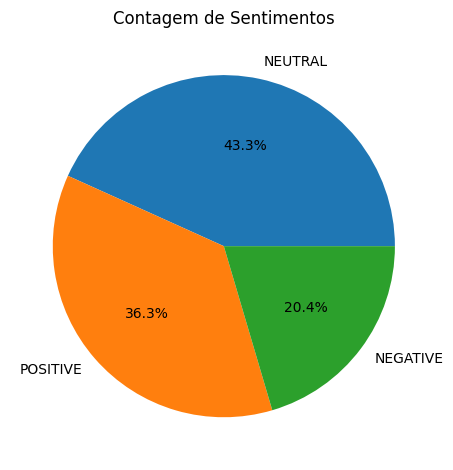

In [ ]:
# Antes do tratamento 

contagemSentimento = base['sentimento'].value_counts()

plt.pie(contagemSentimento.values, labels=contagemSentimento.index, autopct='%1.1f%%')
plt.title('Contagem de Sentimentos')
plt.tight_layout()
plt.show()


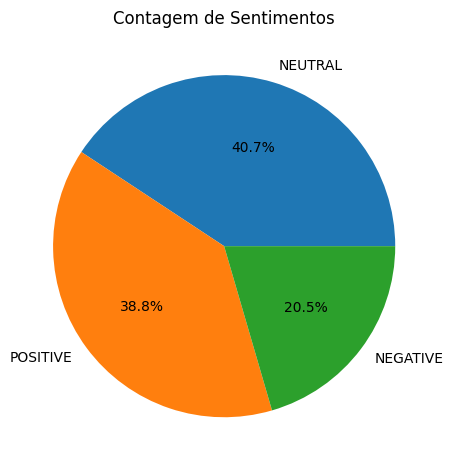

In [ ]:
# depois do tratamento 

contagemSentimento = dados['sentimento'].value_counts()

plt.pie(contagemSentimento.values, labels=contagemSentimento.index, autopct='%1.1f%%')
plt.title('Contagem de Sentimentos')
plt.tight_layout()
plt.show()


## 9.4 Quantidade de autores na base de dados

In [ ]:
# Antes do tratamento

quantidadeAutores = base['autor'].nunique()

print("A base de dados possui", quantidadeAutores, "autores únicos.")

A base de dados possui 5839 autores únicos.


In [ ]:
# Depois do Tratamento

quantidadeAutores = dados['autor_anonimo'].nunique()

print("A base de dados possui", quantidadeAutores, "autores únicos.")

A base de dados possui 2142 autores únicos.


## 9.5 Os usuários que mais realizaram comentários

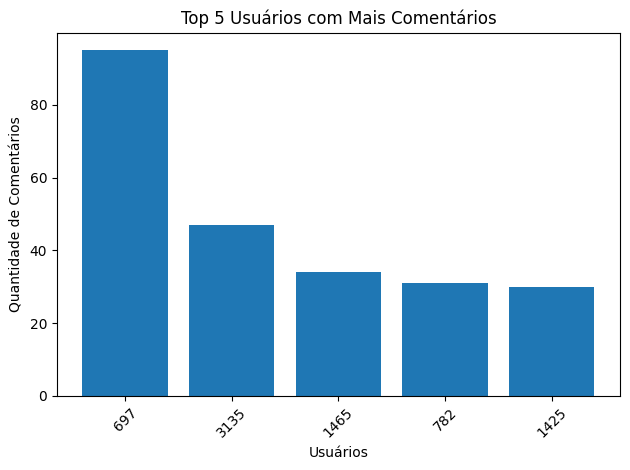

In [ ]:
# Depois do tratamento

contagem_usuarios = dados['autor_anonimo'].value_counts()
top_usuarios = contagem_usuarios.head(5)


plt.bar(top_usuarios.index, top_usuarios.values)
plt.xlabel('Usuários')
plt.ylabel('Quantidade de Comentários')
plt.title('Top 5 Usuários com Mais Comentários')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 9.6 Quantidade de comentários por Tipo de Interação;

In [ ]:
# Antes do tratamento 

contagemSentimento = base['tipoInteracao'].value_counts()

print("A quantidade de comentários por Tipo de Interação: ")
print(contagemSentimento)

A quantidade de comentários por Tipo de Interação: 
marcação      5999
comentário    5389
resposta       967
Name: tipoInteracao, dtype: int64


In [ ]:
# Depois do tratamento

contagemSentimento = dados['tipoInteracao'].value_counts()

print("A quantidade de comentários por Tipo de Interação: ")
print(contagemSentimento)

A quantidade de comentários por Tipo de Interação: 
marcação      1989
comentário    1739
resposta       304
Name: tipoInteracao, dtype: int64


### 9.6.1 Gráfico - Quantidade de comentários por Tipo de Interação;

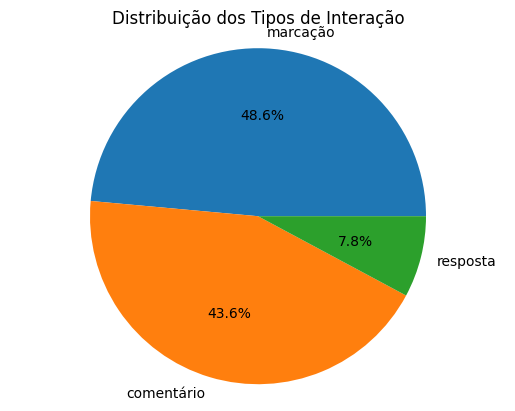

In [ ]:
# Antes do tratamento 

contagem_interacao = base['tipoInteracao'].value_counts()

plt.pie(contagem_interacao.values, labels=contagem_interacao.index, autopct='%1.1f%%')
plt.title('Distribuição dos Tipos de Interação')
plt.axis('equal')
plt.show()

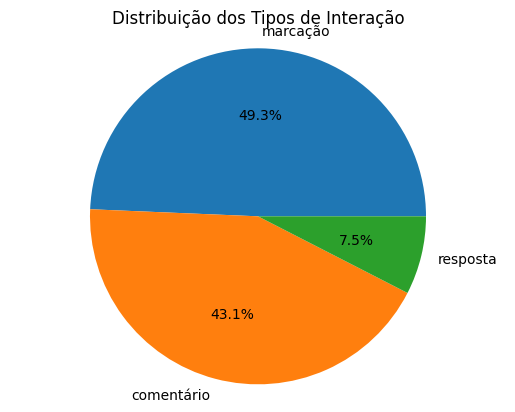

In [ ]:
# Depois do tratamento 

contagem_interacao = dados['tipoInteracao'].value_counts()

plt.pie(contagem_interacao.values, labels=contagem_interacao.index, autopct='%1.1f%%')
plt.title('Distribuição dos Tipos de Interação')
plt.axis('equal')
plt.show()

Essas informações são cruciais para compreender melhor a percepção dos usuários em relação ao banco e para orientar futuras estratégias de comunicação e relacionamento com o público, garantindo uma maior assertividade em futuras publicações do banco BTG.

# Atividade 10: Análise de Dados

Apresentação dos dados combinatórios, ou seja, cruzamento de variáveis para obtenção de insights preliminares.

## 10.1 Gráfico Data X Sentimento

Esse gráfico auxilia a analisar a tendência temporal dos sentimentos nos comentários. O gráfico de linhas mostra como os sentimentos (positivo, negativo e neutro) variam ao longo do tempo. Essa análise permite identificar padrões e tendências nos sentimentos expressos nos comentários, fornecendo insights sobre a evolução das opiniões e emoções dos usuários ao longo do tempo.

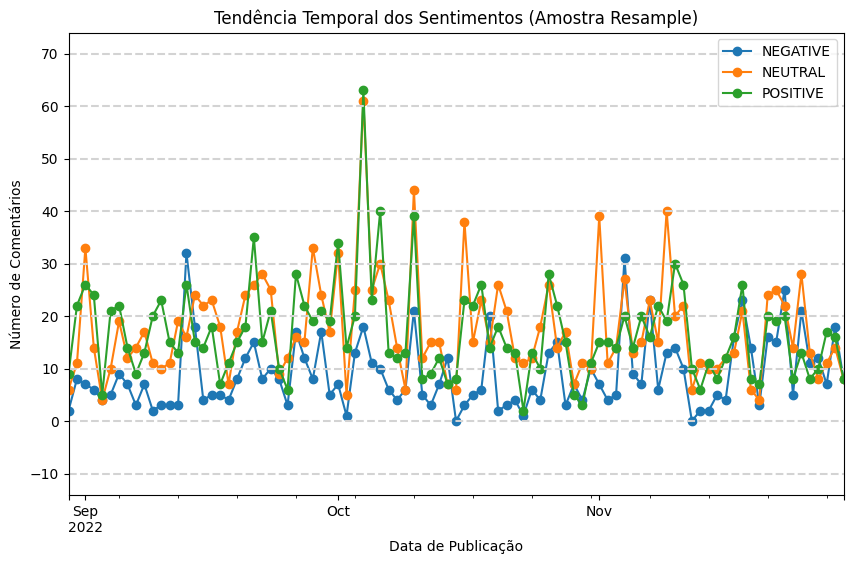

In [ ]:
# Agrupar por data e sentimento e contar o número de ocorrências
data_sentimento_counts = graf_dados.groupby(['dataPublicada', 'sentimento']).size().unstack()

# Resample dos dados para uma frequência menor
data_sentimento_resampled = data_sentimento_counts.resample('1D').sum()  # Resample por intervalos de 7 dias, ajuste conforme necessário

# Criar uma figura com tamanho personalizado
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar o gráfico de linhas na figura
data_sentimento_resampled.plot(kind='line', marker='o', ax=ax)

# Configurar os rótulos dos eixos
ax.set_xlabel('Data de Publicação')
ax.set_ylabel('Número de Comentários')
ax.set_title('Tendência Temporal dos Sentimentos (Amostra Resample)')

# Remover valores NaN e Inf
data_sentimento_cleaned = data_sentimento_resampled.replace([np.inf, -np.inf], np.nan).dropna()
y_max = data_sentimento_cleaned.values.max()

# Traçar uma linha horizontal em cada marcação do eixo do número de comentários
for tick in ax.get_yticks():
    ax.axhline(tick, color='lightgray', linestyle='--')

# Definir os limites do eixo y
# ax.set_ylim(0, y_max + 2)

# Exibir a legenda
ax.legend()

# Exibir o gráfico
plt.show()


## 10.2 Gráfico Dispersão - Sentimento X Autor

Gráfico que visa mostrar o top 5 autores que tem mais comentários dentro da base de dados, correlacionado ao sentimento de seus comentários, em busca de insigths e padrões. 

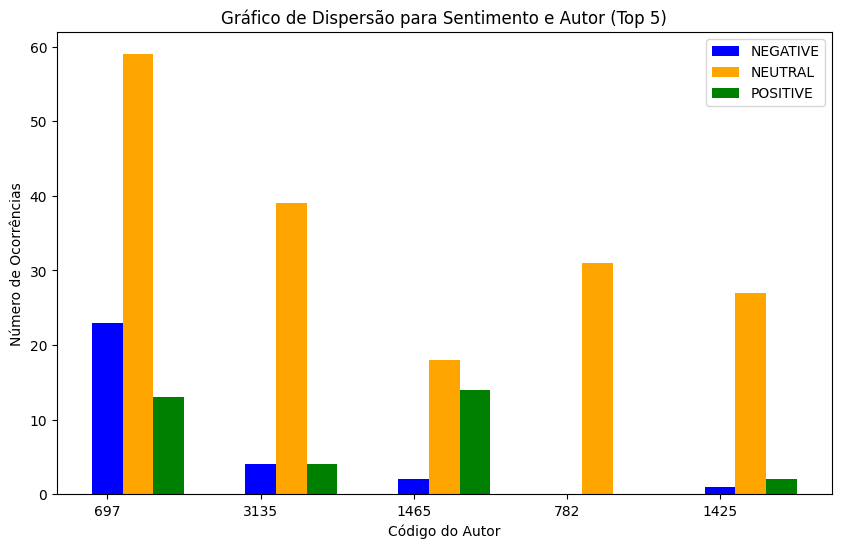

In [ ]:
# Agrupar por autor e sentimento e contar o número de ocorrências
autor_sentimento_counts = dados.groupby(['autor_anonimo', 'sentimento']).size().unstack()

# Calcular o número total de ocorrências de sentimentos por autor
autor_total_counts = autor_sentimento_counts.sum(axis=1)

# Selecionar os top 5 autores mais relevantes
top_autores = autor_total_counts.nlargest(5).index

# Filtrar o DataFrame original apenas para os top 5 autores
autor_sentimento_counts_top5 = autor_sentimento_counts.loc[top_autores]

# Obter os valores dos sentimentos
sentimentos = ['NEGATIVE', 'NEUTRAL', 'POSITIVE']

# Definir as cores para cada sentimento
cores = ['blue', 'orange', 'green']

# Criar uma figura com tamanho personalizado
fig, ax = plt.subplots(figsize=(10, 6))

# Obter a quantidade de autores
quantidade_autores = len(top_autores)

# Definir a largura das barras
largura_barra = 0.2

# Definir a posição dos grupos de barras no eixo x
posicao_barras = range(quantidade_autores)

# Plotar as barras
for i, sentimento in enumerate(sentimentos):
    valores = autor_sentimento_counts_top5[sentimento]
    ax.bar(posicao_barras, valores, width=largura_barra, label=sentimento, color=cores[i])

    # Atualizar a posição das barras para o próximo grupo
    posicao_barras = [pos + largura_barra for pos in posicao_barras]

# Configurar os rótulos dos eixos
ax.set_xlabel('Código do Autor')
ax.set_ylabel('Número de Ocorrências')
ax.set_title('Gráfico de Dispersão para Sentimento e Autor (Top 5)')

# Definir os rótulos do eixo x
ax.set_xticks(range(quantidade_autores))
ax.set_xticklabels(top_autores)

# Exibir a legenda
ax.legend()

# Exibir o gráfico de barras
plt.show()

## 10.3 Gráfico Word Cloud geral sem seleção de data

O gráfico de Word Cloud serve para visualizar de forma intuitiva as palavras mais frequentes em um conjunto de dados textuais. Ele ajuda a identificar os termos que aparecem com maior frequência e fornece uma representação visual das palavras mais relevantes. Isso pode ser útil para compreensão geral dos principais temas ou tópicos abordados nos comentários. Neste caso, a nuvem foi baseada na base de dados completa.

In [ ]:
# Definir cores para cada sentimento
sentimento_cores = {
    'NEGATIVE': '#0000FF',  # Azul
    'NEUTRAL': '#FFA500',   # Laranja
    'POSITIVE': '#008000'   # Verde
}

# Definir cor padrão para palavras sem sentimento definido
cor_padrao = 'black'

# Definir cores personalizadas com base no sentimento
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    sentimento = dados.loc[dados['texto_normalizado'].str.contains(word), 'sentimento'].values
    if len(sentimento) > 0:
        sentimento = sentimento[0]
        return sentimento_cores.get(sentimento, cor_padrao)
    else:
        return cor_padrao

# Converter cada lista de tokens em uma string
textos = [' '.join(tokens) for tokens in tokens_processados]

# Concatenar todas as strings em uma única string
textos_concatenados = ' '.join(textos)

# Criar a Word Cloud com cores personalizadas
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(textos_concatenados)

# Plotar a Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras')
plt.show()

NameError: ignored

## 10.4 Gráfico de Word Cloud: Análise de Palavras Mais Frequentes em Comentários durante Período de Picos

Gráfico de nuvem de palavras, visando mostrar as frequências das palavras utilizadas quanto aos picos encontrados no gráfico de Data X Sentimento.

In [ ]:
# Mapear os sentimentos para as cores correspondentes
sentimento_cores = {
    'NEGATIVE': '#0000FF',  # Azul
    'NEUTRAL': '#FFA500',   # Laranja
    'POSITIVE': '#008000'   # Verde
}

# Definir cor padrão para palavras sem sentimento definido
cor_padrao = 'black'

# Definir cores personalizadas com base no sentimento
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    sentimento = graf_dados.loc[graf_dados['texto_normalizado'].str.contains(word), 'sentimento'].values
    if len(sentimento) > 0:
        sentimento = sentimento[0]
        return sentimento_cores.get(sentimento, cor_padrao)
    else:
        return cor_padrao

# Converter a coluna 'dataPublicada' para o tipo datetime
graf_dados['dataPublicada'] = pd.to_datetime(graf_dados['dataPublicada'], format='%d-%m-%Y')

# Filtrar o DataFrame com base nas datas
data_inicio = pd.to_datetime('01-09-2022', format='%d-%m-%Y')
data_fim = pd.to_datetime('01-12-2022', format='%d-%m-%Y')
textos_filtrados = graf_dados[(graf_dados['dataPublicada'] >= data_inicio) & (graf_dados['dataPublicada'] <= data_fim)]['texto_normalizado']

# Concatenar os textos filtrados em uma única string
textos_concatenados = ' '.join(textos_filtrados)

# Processar o texto concatenado para gerar os tokens
stop_words = set(stopwords.words('portuguese'))
tokens_processados = [token for token in word_tokenize(textos_concatenados.lower()) if token not in stop_words]

# Converter os tokens processados de volta para uma string
textos_processados = ' '.join(tokens_processados)

# Criar a Word Cloud com cores personalizadas
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(textos_processados)

# Plotar a Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras (01-12-2022 a 15-12-2022)')
plt.show()

# Atividade 11: Amostragem

## 11.1. Contabilizar os valores

Para contar o número de ocorrências de cada classificação, você pode usar o método value_counts() da coluna em questão. Isso retornará uma série com a contagem de cada valor único na coluna.

In [ ]:
contagem = dados['sentimento'].value_counts()
print(contagem)

NEUTRAL     1642
POSITIVE    1564
NEGATIVE     826
Name: sentimento, dtype: int64


## 11.2. Normalizar os valores

A normalização pode ser feita usando diferentes técnicas, dependendo do que você deseja alcançar com seus dados. Uma opção comum é usar a técnica de codificação one-hot (ou one-hot encoding) para transformar as classificações em variáveis binárias. O pandas fornece o método get_dummies() que pode ser usado para realizar a codificação one-hot.

### 11.2.1. Teste isolado da normalização

In [ ]:
# Valores de teste
dadosNormalizacao = pd.DataFrame({'sentimento': ['positivo', 'negativo', 'neutro', 'positivo', 'neutro','positivo', 'negativo', 'neutro', 'positivo', 'negativo']})

# Definição da função
def codificar_coluna(coluna):
    coluna_codificada = pd.get_dummies(coluna)
    return coluna_codificada

# Aplica a função de teste
codificar_coluna(dadosNormalizacao['sentimento'])

,negativo,neutro,positivo
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


### 11.2.2. Definição da função de normalização

In [ ]:
#Função de codificação one-hot da coluna
def codificar_coluna(coluna):
    coluna_codificada = pd.get_dummies(coluna)
    return coluna_codificada

### 11.2.3. Teste da função de normalização

In [ ]:
# Aplica a função à coluna "sentimento" do DataFrame
codificar_coluna(dados['sentimento'])

,NEGATIVE,NEUTRAL,POSITIVE
8323,1,0,0
8324,0,0,1
8325,0,0,1
8326,0,1,0
8327,0,0,1
...,...,...,...
12350,0,1,0
12351,0,1,0
12352,0,0,1
12353,0,1,0


## 11.3. Amostragem ou Normalização

A normalização é um processo de transformação dos dados para que estejam em uma escala semelhante, enquanto a amostragem envolve a seleção de uma parte representativa dos dados.Para normalizar os dados, utilizamos o z-score e utilizamos o método sample() do DataFrame para obter uma amostra aleatória dos dados.


### 11.3.1. Teste isolado da amostragem

In [ ]:
# Valores de teste
dadosAmostragem = pd.DataFrame({'sentimento': ['positivo', 'negativo', 'neutro', 'positivo', 'neutro','positivo', 'negativo', 'neutro', 'positivo', 'negativo']})

# Definição da função
def normalizar_coluna_teste(dados):
    coluna_codificada = codificar_coluna(dados)
    scaler = StandardScaler()
    coluna_normalizada = scaler.fit_transform(coluna_codificada)
    df_normalizado = pd.DataFrame(coluna_normalizada, columns=coluna_codificada.columns)
    return df_normalizado

# Aplica a função de teste
normalizar_coluna_teste(dados['sentimento'])

,NEGATIVE,NEUTRAL,POSITIVE
0,1.970116,-0.828872,-0.796060
1,-0.507584,-0.828872,1.256187
2,-0.507584,-0.828872,1.256187
3,-0.507584,1.206458,-0.796060
4,-0.507584,-0.828872,1.256187
...,...,...,...
4027,-0.507584,1.206458,-0.796060
4028,-0.507584,1.206458,-0.796060
4029,-0.507584,-0.828872,1.256187
4030,-0.507584,1.206458,-0.796060


### 11.3.2. Definição da função de amostragem

In [ ]:
def normalizar_coluna(dados):
    # Criar codificação one-hot para a coluna
    coluna_codificada = codificar_coluna(dados)
    # Aplicar a normalização z-score na coluna codificada
    scaler = StandardScaler()
    coluna_normalizada = scaler.fit_transform(coluna_codificada)
    # Criar um novo DataFrame com as colunas normalizadas
    df_normalizado = pd.DataFrame(coluna_normalizada, columns=coluna_codificada.columns)
    return df_normalizado

### 11.2.3. Teste da função de normalização

In [ ]:
# Aplica a função à coluna "sentimento" do DataFrame
df_normalizado = normalizar_coluna(dados['sentimento'])
df_normalizado

,NEGATIVE,NEUTRAL,POSITIVE
0,1.970116,-0.828872,-0.796060
1,-0.507584,-0.828872,1.256187
2,-0.507584,-0.828872,1.256187
3,-0.507584,1.206458,-0.796060
4,-0.507584,-0.828872,1.256187
...,...,...,...
4027,-0.507584,1.206458,-0.796060
4028,-0.507584,1.206458,-0.796060
4029,-0.507584,-0.828872,1.256187
4030,-0.507584,1.206458,-0.796060


In [ ]:
# Obter uma amostra aleatória do DataFrame
amostra = df_normalizado.sample(n=100, random_state=42)  # Neste exemplo, estou selecionando 100 linhas aleatórias
amostra

,NEGATIVE,NEUTRAL,POSITIVE
1138,-0.507584,1.206458,-0.796060
657,-0.507584,1.206458,-0.796060
670,-0.507584,-0.828872,1.256187
2800,-0.507584,1.206458,-0.796060
1988,-0.507584,1.206458,-0.796060
...,...,...,...
2887,1.970116,-0.828872,-0.796060
1971,-0.507584,-0.828872,1.256187
2579,-0.507584,1.206458,-0.796060
2474,-0.507584,-0.828872,1.256187


In [ ]:
# Calcular a frequência de valores
contagem1 = amostra.value_counts()
contagem1

NEGATIVE   NEUTRAL    POSITIVE 
-0.507584   1.206458  -0.796060    40
           -0.828872   1.256187    33
 1.970116  -0.828872  -0.796060    27
dtype: int64

# Atividade 12 - Implementação do modelo Word2Vec ETL

CBOW (Continuous Bag-of-Words) e Skip-gram

## Implementação

In [ ]:
def preprocess_sentence(sentence):
    # Tokenização da frase em palavras
    tokens = word_tokenize(sentence)

    # Remoção de stopwords
    stop_words = set(stopwords.words('portuguese'))  # Defina o idioma desejado
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    return filtered_tokens

def process_objects(objects):
    result = []
    for obj in objects:
        tokens = preprocess_sentence(obj)
        result.append(tokens)
    return result

processed_objects = process_objects(texto_normalizado__)
array_of_arrays = processed_objects  # Engloba todas as frases em um array externo

print(array_of_arrays)


[['Quer', 'visualizar', 'saldo', 'todas', 'contas', 'bancarias', 'lugar', 'solucao', 'ajudar', 'compartilha', 'dados', 'outras', 'instituicoes', 'Open', 'Finance', 'aplicativo', 'Banking', 'gera', 'visao', 'global', 'soma', 'saldos', 'todas', 'contas', 'funcao', 'pratica', 'facilita', 'vida', 'financeira', 'Confira', 'video', 'passo', 'passo', 'aproveite', 'jeito', 'Open', 'desktop_computer', 'wwwamgcapitalcombr', 'email', 'Email', 'contato', 'amgcapitalcombr', 'Credenciados', 'telephone', 'Telefones', 'Paulo', '11', '3077', '4600', 'Porto', 'Alegre', '51', '3557', '1880', 'Florianopolis', '48', '3371', '4611', 'double_exclamation_mark', 'DISCLAIMER', 'post', 'carater', 'informativo', 'constitui', 'oferta', 'compra', 'venda', 'ativos', 'financeiros', 'AMGCapital', 'Investimentos', 'Acoes', 'FIIs', 'TesouroDireto', 'LCI', 'LCA', 'CDB', 'ETFs', 'Debentures', 'IR', 'economia', 'ibovespa', 'educacaofinanceira'], ['Precos', 'excelentes', 'hora', 'investir', 'boas', 'empresas', 'temas', 'des

In [ ]:
import pandas as pd
from gensim.models import Word2Vec

# Treinamento do modelo Word2Vec
model = Word2Vec(array_of_arrays, min_count=1)

# Tabela de palavras e seus vetores correspondentes
word_table = []
for word, idx in model.wv.key_to_index.items():
    word_vector = model.wv.get_vector(word)
    word_table.append((word, word_vector))

# Criando o dataframe
dfW2V = pd.DataFrame(word_table, columns=['Palavra', 'Vetor'])

# Exibindo o dataframe
print(dfW2V)

               Palavra                                              Vetor
0        investimentos  [-0.42640045, 0.56064695, 0.30660826, 0.134211...
1                banco  [-0.3614921, 0.44235227, 0.21202236, 0.0843732...
2               evento  [-0.40428972, 0.5328254, 0.24125923, 0.0984396...
3              mercado  [-0.4449478, 0.58643913, 0.27582023, 0.0897746...
4               melhor  [-0.32945406, 0.42424253, 0.2019285, 0.0637744...
...                ...                                                ...
21565             Pepe  [-0.003457363, -0.0031203977, 0.0042893067, 0....
21566             HEXA  [0.0074582943, -0.0034003784, -0.00014254608, ...
21567   bigyourownboss  [-0.0104652345, 0.0061298944, 0.002511842, 0.0...
21568  workingfromhome  [-0.0066008293, -0.002666037, -0.0033441694, 0...
21569      paulosaiter  [-0.0025954507, 0.008451202, -0.0049935966, 0....

[21570 rows x 2 columns]


In [ ]:
from gensim.models import Word2Vec

# Treinamento do modelo Word2Vec
model = Word2Vec(array_of_arrays, min_count=1)

# Tabela de palavras e seus vetores correspondentes
word_table = []
for word, idx in model.wv.key_to_index.items():
    word_vector = model.wv.get_vector(word)
    word_table.append((word, word_vector))

# Imprimindo a tabela de palavras e vetores
for word, vector in word_table:
    print("Palavra:", word)
    print("Vetor:", vector)
    print("---")


A saída de streaming foi truncada nas últimas 5000 linhas.
  5.6001428e-04  1.7823898e-03 -9.2559922e-03  3.7503934e-03
 -7.9690265e-03  3.6885345e-03  4.3585026e-03 -7.5218845e-03
  1.3545704e-03 -6.9576250e-03  3.6184872e-03  6.6805887e-03
  9.5881177e-03 -3.4803294e-03  4.7392179e-03  1.3677955e-04]
---
Palavra: check_mark_buttoncheck_mark_button
Vetor: [ 0.0054029   0.00903602  0.00846147  0.00440376  0.00350711  0.00131531
  0.00541581 -0.00184895  0.00928889  0.00057249  0.01067059  0.00787751
  0.00570625  0.0069682  -0.00768254 -0.00311485  0.00941759  0.00699664
 -0.0067001   0.00568005  0.00530683 -0.00615126 -0.00501329  0.00746867
  0.00771578  0.00907162  0.00484493  0.00206355 -0.00830573  0.00083629
 -0.00836022  0.00835497 -0.00950555 -0.00719353 -0.00230043 -0.0050425
  0.00134091  0.00695369 -0.00826073  0.00410594  0.00821976 -0.00709
  0.00590108 -0.00475641  0.0054643   0.0045815  -0.00912671  0.00779664
  0.01035303 -0.00708396  0.00543181 -0.00391515  0.00892473 

In [ ]:
dados["sentimento"] = dados["sentimento"].replace({'NEGATIVE': -1, 'POSITIVE': 1, 'NEUTRAL': 0})
dados["sentimento"]

8323    -1
8324     1
8325     1
8326     0
8327     1
        ..
12350    0
12351    0
12352    1
12353    0
12354   -1
Name: sentimento, Length: 4032, dtype: int64

In [ ]:
import pandas as pd
from gensim.models import Word2Vec

# Treinamento do modelo Word2Vec
model = Word2Vec(array_of_arrays, min_count=1)

# Tabela de frases e seus vetores correspondentes
sentence_table = []
for sentence in array_of_arrays:
    word_vectors = [model.wv[word] for word in sentence if word in model.wv]
    if len(word_vectors) > 0:
        sentence_vector = sum(word_vectors) / len(word_vectors)
    else:
        sentence_vector = [None] * 100  # Cria uma lista de 100 elementos None
    sentence_table.append((sentence, *sentence_vector[:50]))  # Adiciona apenas os primeiros 50 elementos do vetor

# Obter os rótulos das colunas
column_labels = ['Frase']
for i in range(50):
    column_labels.append(f'Vetor{i+1}')

# Criando o dataframe
dfW2V = pd.DataFrame(sentence_table, columns=column_labels)

dados["sentimentoNumerico"] = dados["sentimento"].replace({'NEGATIVE': -1, 'POSITIVE': 1, 'NEUTRAL': 0})

# Definir o índice do DataFrame dfW2V como o mesmo índice de dados['sentimentoNumerico']
dfW2V.set_index(dados['sentimentoNumerico'].index, inplace=True)

dfW2V['sentimento'] = dados['sentimentoNumerico']

# Remover linhas em que a coluna 'Frase' contém apenas []
dfW2V = dfW2V[dfW2V['Frase'].apply(lambda x: len(x) > 0)]

# Especificando o diretório de destino para salvar o arquivo CSV
diretorio_destino = '/content/drive/MyDrive/G5_M6/BASE/'

# Salvando o dataframe em um arquivo CSV no diretório especificado
caminho_arquivo_csv = diretorio_destino + 'sentence_vectors.csv'
dfW2V.to_csv(caminho_arquivo_csv, index=False)

print("Arquivo 'sentence_vectors.csv' salvo com sucesso em:", caminho_arquivo_csv)

Arquivo 'sentence_vectors.csv' salvo com sucesso em: /content/drive/MyDrive/G5_M6/BASE/sentence_vectors.csv
